In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.io.fits as fitsio
from astropy.coordinates import SkyCoord
import astropy.units as u

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from importlib import reload
import sys
sys.path.append('/Users/nora/projects/stream_search/code')
import plot_density
reload(plot_density)
import streamlib
reload(streamlib)
import skymap
reload(skymap)
print(skymap.__version__)
import galstreams
reload(galstreams)

0.2.0


<module 'galstreams' from '/Users/nora/miniconda3/envs/py3/lib/python3.7/site-packages/galstreams-1.0.0-py3.7.egg/galstreams/__init__.py'>

In [9]:
mw_streams = galstreams.MWStreams(verbose=False)

In [10]:
plot_density.plot_pretty(figsize=(12,12))

# 300S Spec Mems

In [11]:
# from https://arxiv.org/pdf/1804.08622.pdf tables 1, 2

spec_data = np.genfromtxt('../data/300S_members.txt', names=['ra', 'dec', 'vhel', 'vhel_sig', 'feh', 'feh_sig', 'g', 'r', 'i', 'mem', 'pmra', 'pmdec', 'pmra_error', 'pmdec_error', 'pmra_pmdec_corr'])
spec_data = spec_data[spec_data['mem'] == 1]
print(spec_data.size)


11


In [12]:
ends = [(145, 17), (160, 15)]

R = np.array(streamlib.get_rotmat(ends=ends))
print(R)

215.92384679395207 162.07384297300098 64.51092165659998
[[-0.8523808   0.44300773  0.27783289]
 [ 0.49075088  0.86117326  0.13245449]
 [-0.1805839   0.2492484  -0.95145399]]


In [13]:
import rotation_matrix
spec_phi1, spec_phi2 = rotation_matrix.phi12_rotmat(spec_data['ra'], spec_data['dec'], R)
spec_pmphi1, spec_pmphi2 = rotation_matrix.pmphi12_reflex(spec_data['ra'], spec_data['dec'], spec_data['pmra'], spec_data['pmdec'], R, 16.5)

# Filtered Data

In [13]:
filename = '/Users/nora/projects/stream_search/data/decals_dr8_iso_hpxcube_v6.fits.gz'
hpxcube, fracdet, modulus = plot_density.load_hpxcube(filename)

Reading /Users/nora/projects/stream_search/data/decals_dr8_iso_hpxcube_v6.fits.gz...
Skipping fracdet...


In [14]:
mw_streams.keys()

dict_keys(['VOD/VSS', 'Monoceros', 'EBS', 'Her-Aq', 'PAndAS', 'Tri-And', 'Tri-And2', 'PiscesOv', 'EriPhe', 'Phoenix', 'WG1', 'WG2', 'WG3', 'WG4', 'Acheron', 'Cocytos', 'Lethe', 'Styx', 'ACS', 'Pal15', 'Eridanus', 'TucanaIII', 'Indus', 'Jhelum', 'Ravi', 'Chenab', 'Elqui', 'Aliqa_Uma', 'Turbio', 'Willka_Yaku', 'Turranburra', 'Wambelong', 'Palca', 'Jet', 'Gaia-1', 'Gaia-2', 'Gaia-3', 'Gaia-4', 'Gaia-5', 'PS1-A', 'PS1-B', 'PS1-C', 'PS1-D', 'PS1-E', 'ATLAS', 'Ophiucus', 'Sangarius', 'Scamander', 'Corvus', '20.0-1', 'Sgr-L10', 'Orphan', 'Pal5', 'GD-1', 'Tri/Pis', 'NGC5466', 'Alpheus', 'Hermus', 'Hyllus', 'Cetus', 'Kwando', 'Molonglo', 'Murrumbidgee', 'Orinoco', 'Phlegethon', 'Slidr', 'Sylgr', 'Ylgr', 'Fimbulthul', 'Svol', 'Fjorm', 'Gjoll', 'Leiptr'])

In [15]:
mu = 16.0
data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=True, center=True, sgr=False, bmax=25, cmax=40)
bkg = 0

In [ ]:
coords = 'cel'
stream = None

reload(plot_density)
smap = plot_density.plot_density(data, bkg, center=(120,30), vmax=18)

smap = plot_density.plot_density(data, bkg, center=(120,30), vmax=20)
plot_density.plot_streams(smap, mu, dmu=100)

smap = plot_density.plot_density(data, bkg, center=(120,30), vmax=18)
plot_density.plot_dwarfs_globs(smap, data, mu, 50, coords=coords, coord_stream=stream)

In [ ]:
reload(plot_density)
mu = 16
coords='cel'
lon, lat = 190, 0
center = (lon, lat)
vmin, vmax = 0, 12
sigma = 0.2
proj = 'ortho'
stream = None

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
bkg = plot_density.fit_background(data, center=center, coords=coords, coord_stream=stream, proj=proj, sigma=sigma, deg=5)
smap = plot_density.plot_density(data, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)
smap = plot_density.plot_density(data, bkg, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)

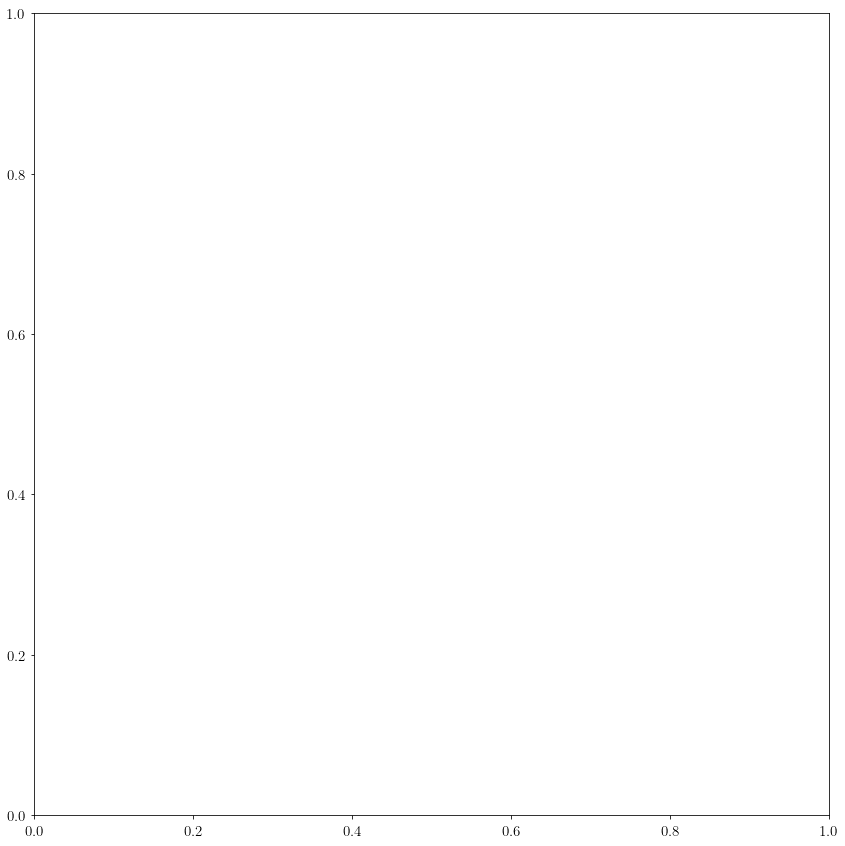

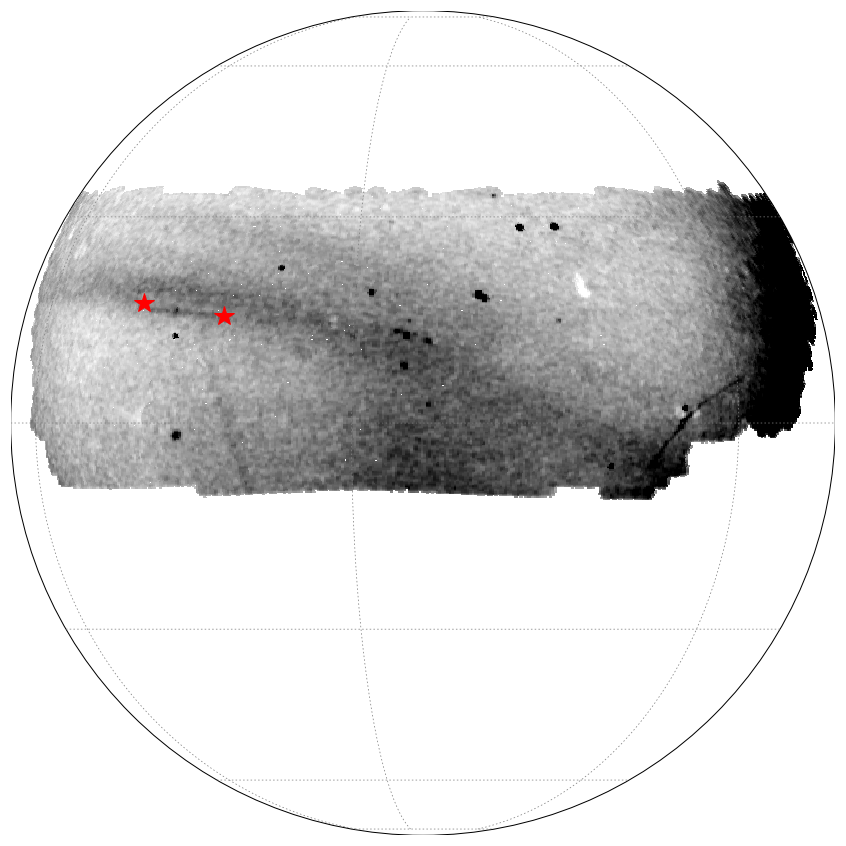

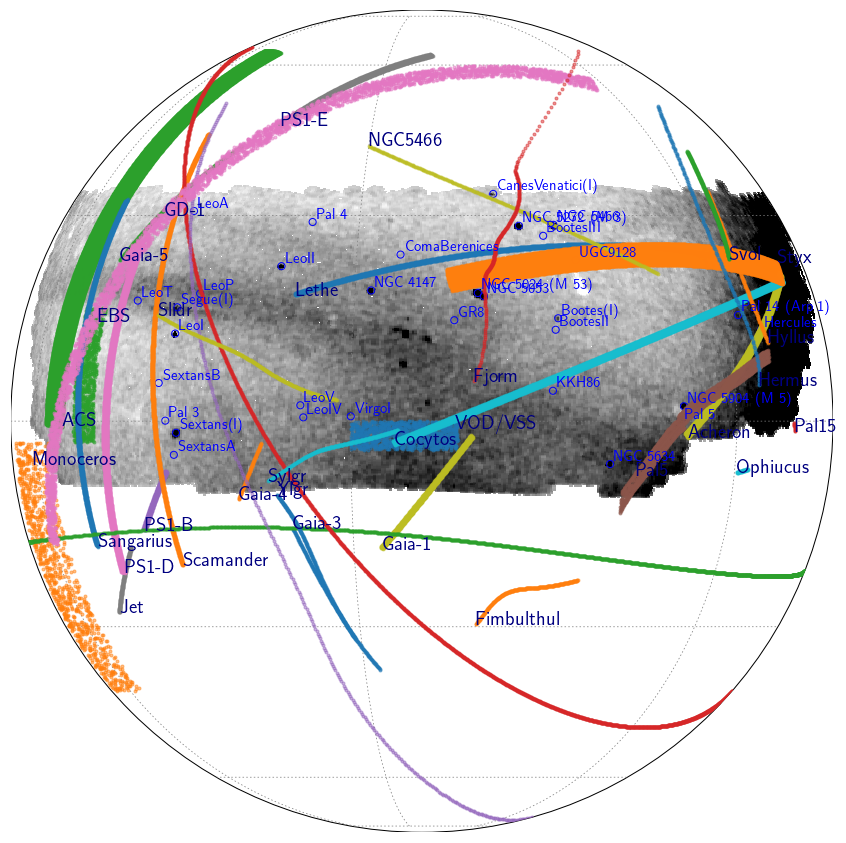

In [258]:
reload(plot_density)
mu = 16
coords='cel'
lon, lat = 190, 0
center = (lon, lat)
vmin, vmax = -40, 15
sigma = 0.2
proj = 'ortho'

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
bkg = plot_density.fit_background(data, center=center, coords=coords, coord_stream=stream, proj=proj, sigma=sigma, deg=5)

smap = plot_density.plot_density(data, bkg, center=center, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)
# smap = plot_density.plot_density(data_north, 0, center=(lon,lat), vmax=vmax, coords=coords, proj='ortho', xsize=3000, smooth=sigma, smap=smap)

# smap = plot_density.plot_density(bkg, 0, center=center, vmax=vmax, coords='cel', proj=proj, xsize=3000, smooth=sigma)

x1, y1 = smap(150-5,15+2)
x2, y2 = smap(150+10,15)
# x, y = smap(150, 15)
smap.plot([x1,x2], [y1,y2], 'r*', ms=20)

# smap = plot_density.plot_density(data, 0, center=(lon, lat), vmax=300, coords='gal', proj='ortho', xsize=2000)
# plot_density.plot_stream_list(smap, ['ATLAS', 'Molonglo', 'Murrumbidgee', 'Orinoco', 'Kwando'], coords='gal')

# smap = plot_density.plot_density(data, 0, center=(lon, lat), vmax=vmax, coords=coords, proj='ortho', xsize=2000, smooth=0.2)
# plot_density.plot_streams(smap, mu, 50, coords=coords)

smap = plot_density.plot_density(data, bkg, center=center, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)
plot_density.plot_streams(smap, mu, dmu=100)
plot_density.plot_dwarfs_globs(smap, data, mu, 50, coords=coords, coord_stream=stream)

In [29]:
np.arange(14, 18.05, 0.1)

array([14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. ,
       15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16. , 16.1,
       16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2,
       17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18. ])

In [17]:
ends = [(145, 17), (160, 15)]

R = np.array(streamlib.get_rotmat(ends=ends))
print(R)

215.92384679395207 162.07384297300098 64.51092165659998
[[-0.8523808   0.44300773  0.27783289]
 [ 0.49075088  0.86117326  0.13245449]
 [-0.1805839   0.2492484  -0.95145399]]


In [18]:
ll = np.array([-9.440, -7.813, -6.815, -5.595, -4.263, -2.969, -1.749, -0.307, 1.653, 2.540, 3.501, 4.463, 5.535])
bb = np.array([-0.175, -0.212, -0.212, -0.249, -0.175, -0.285, -0.322, -0.285, -0.470, -0.470, -0.581, -0.618, -0.803])
bb *= -1
p1 = np.polyfit(ll, bb, deg=2)
track_phi12 = lambda xx: p1[0]*xx**2 + p1[1]*xx + p1[2]

ra_ll, dec_bb = rotation_matrix.phi12_rotmat(np.array(ll), np.array(bb), np.linalg.inv(R))
ra, dec = rotation_matrix.phi12_rotmat(np.array(ll), np.array(bb), np.linalg.inv(R))
p2 = np.polyfit(ra, dec, deg=2)
track_radec = lambda xx: p2[0]*xx**2 + p2[1]*xx + p2[2]


In [19]:
xx = np.concatenate([ll, spec_phi1])
yy = np.concatenate([bb, spec_phi2])
p3 = np.polyfit(xx, yy, deg=2)
track_combo_phi12 = lambda xx: p3[0]*xx**2 + p3[1]*xx + p3[2]

xx = np.concatenate([ra_ll, spec_data['ra']])
yy = np.concatenate([dec_bb, spec_data['dec']])
p4 = np.polyfit(xx, yy, deg=2)
track_combo_radec = lambda xx: p4[0]*xx**2 + p4[1]*xx + p4[2]


In [20]:
print(['%.6f' %p for p in p4])
# dec = -0.004498 * ra**2 + 1.297541 * ra - 77.435981
dec_track = lambda ra: -0.004498 * ra**2 + 1.297541 * ra - 77.435981

['-0.004498', '1.297541', '-77.435981']


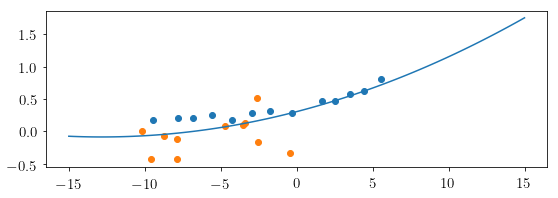

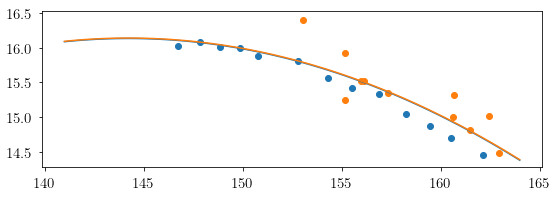

In [21]:
plt.figure(figsize=(8,3))
plt.scatter(ll, bb)
plt.scatter(spec_phi1, spec_phi2)
xx = np.linspace(-15, 15, 100)
plt.plot(xx, track_combo_phi12(xx))


plt.figure(figsize=(8,3))
plt.scatter(ra_ll, dec_bb)
plt.scatter(spec_data['ra'], spec_data['dec'])
xx = np.linspace(ends[0][0]-4, ends[1][0]+4, 100)
plt.plot(xx, track_combo_radec(xx))
plt.plot(xx, dec_track(xx))


plt.show()

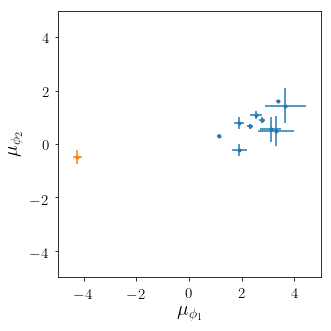

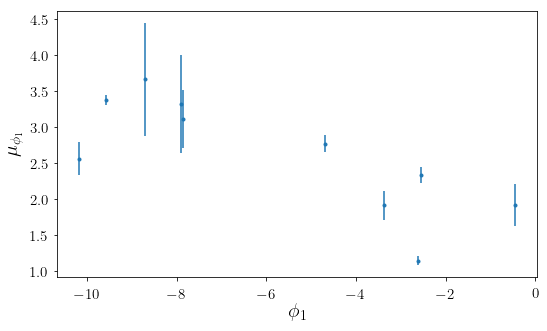

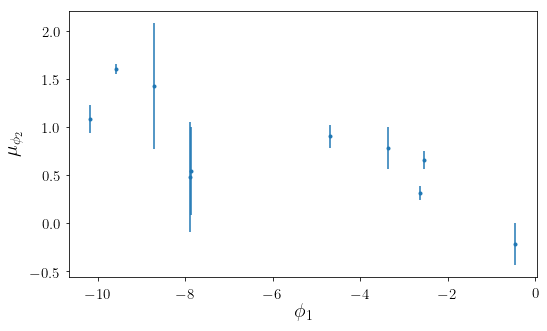

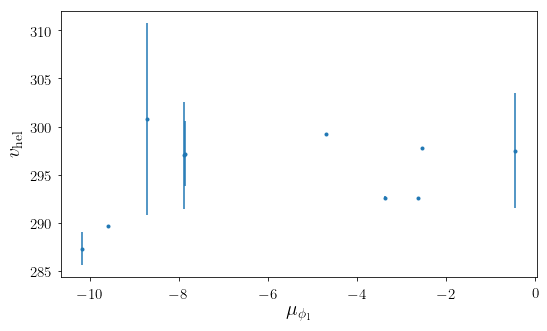

In [148]:
plot_density.plot_pretty(fontsize=20)

pm_cut = spec_pmphi1 < 0

plt.figure(figsize=(5,5))
plt.errorbar(spec_pmphi1[~pm_cut], spec_pmphi2[~pm_cut], xerr=spec_data['pmra_error'][~pm_cut], yerr=spec_data['pmdec_error'][~pm_cut], fmt='.')
plt.errorbar(spec_pmphi1[pm_cut], spec_pmphi2[pm_cut], xerr=spec_data['pmra_error'][pm_cut], yerr=spec_data['pmdec_error'][pm_cut], fmt='.')
# plt.scatter(spec_pmphi1, spec_pmphi2, alpha=0.8, s=5./spec_data['pmra_error'])
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel(r'$\mu_{\phi_1}$')
plt.ylabel(r'$\mu_{\phi_2}$')

plt.figure(figsize=(8,5))
plt.errorbar(spec_phi1[~pm_cut], spec_pmphi1[~pm_cut], yerr=spec_data['pmra_error'][~pm_cut], fmt='.')
plt.xlabel(r'$\phi_1$')
plt.ylabel(r'$\mu_{\phi_1}$')

plt.figure(figsize=(8,5))
plt.errorbar(spec_phi1[~pm_cut], spec_pmphi2[~pm_cut], yerr=spec_data['pmdec_error'][~pm_cut], fmt='.')
plt.xlabel(r'$\phi_1$')
plt.ylabel(r'$\mu_{\phi_2}$')

plt.figure(figsize=(8,5))
plt.errorbar(spec_phi1[~pm_cut], spec_data['vhel'][~pm_cut], yerr=spec_data['vhel_sig'][~pm_cut], fmt='.')
plt.xlabel(r'$\mu_{\phi_1}$')
plt.ylabel(r'$v_{\rm hel}$')

plt.show()

In [54]:
help(rotation_matrix.pmphi12_reflex)
np.mean([14, 19])

Help on function pmphi12_reflex in module rotation_matrix:

pmphi12_reflex(alpha, delta, mu_alpha_cos_delta, mu_delta, R_phi12_radec, dist, vlsr=array([ 11.1, 240. ,   7.3]))
    returns proper motions in coordinates defined by R_phi12_radec transformation corrected by the Sun's reflex motion
    all angles must be in degrees
     vlsr = np.array([11.1,240.,7.3])



16.5

In [42]:
plot_density.dist2mod([14, 19])

array([15.73064018, 16.393768  ])

[-9 -7 -5 -3 -1  1  3  5] [ 0.05124904  0.00527812 -0.0597033  -0.14369519 -0.24669758 -0.36871045
 -0.50973381 -0.66976765]


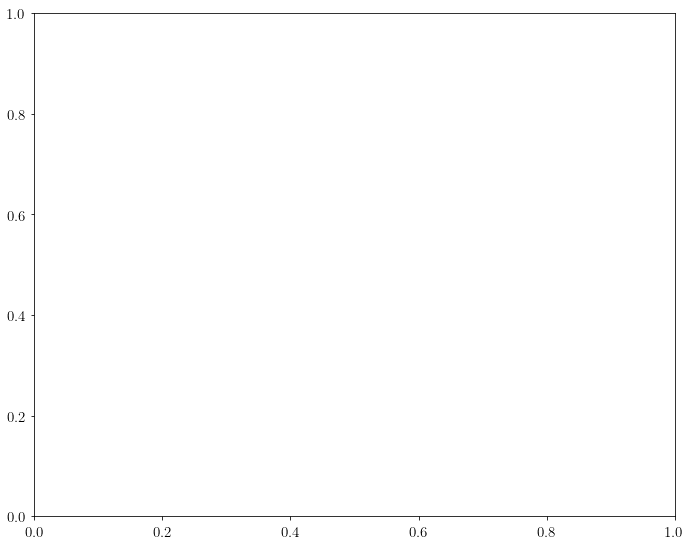

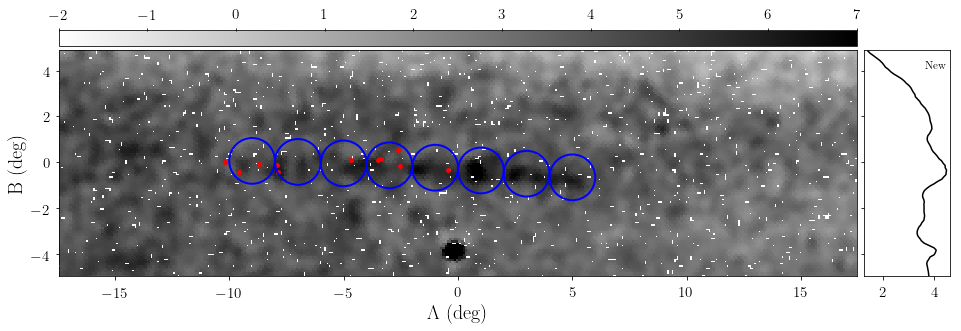

In [156]:
from matplotlib.patches import Ellipse
# reload(plot_density)
# reload(streamlib)

x = np.arange(-9, 5+1, 2)
y = -track_combo_phi12(x)
print(x, y)

radius = 1.
widths = 2*radius / np.cos(np.deg2rad(y))
heights = np.full_like(x, 2*radius)

ends = [(145, 17), (160, 15)]
# for mu in modulus:
for mu in [16.0]:
    ax = plot_density.plot_stream_zoom(hpxcube, fracdet, modulus, stream=None, ends=ends, mu=mu, width=0.3, sigma=0.2, delta=0.1, vmin=-2, vmax=7)
    
    ells = []
    for i in range(len(x)):
        ell = Ellipse((x[i], y[i]), width=widths[i], height=heights[i], angle=0, fc='none', ec='b', lw=2, fill=0, ls='-')
        ells.append(ell)

    for i, e in enumerate(ells):
        ax.add_artist(e)

    ax.scatter(spec_phi1, spec_phi2, s=15, c='r')
    # plt.savefig('../plots_%.1f_%.1f_%.1f_%.1f_%.1f.png' %(ends[0][0], ends[0][1], ends[1][0], ends[1][1], mu))

In [14]:
# 300S Hess
from astropy.io import fits as fitsio

data300 = fitsio.open('../data/300s_data.fits')[1].data

In [15]:
import rotation_matrix
phi1, phi2 = rotation_matrix.phi12_rotmat(data300['RA'], data300['DEC'], R)

In [36]:
from scipy.stats import norm
gaus = lambda xx, loc, scale, amp, a, b: (a*xx + b) + amp*norm.pdf(xx, loc, scale) 

In [66]:
params = [1, 0, 0.35, 1]
print(log_likelihood(params, lat))

0.87731989612085
-10470110.735617584


In [137]:
def log_prior(params, xi):
    A, mu, sigma, H = params
    if (A <= 1) and (A > 0) and (np.abs(mu) <= 1) and (sigma <= 1) and (sigma > 0) and (np.abs(H) <= 1):
        return 0.
    return -np.inf

def log_likelihood(params, xi):
    prior = log_prior(params, xi)
    if not np.isfinite(prior):
        return -np.inf

    A, mu, sigma, H = params
    L = np.abs(xi.max() - xi.min())
    h1 = 1 
    h2 = 10**H
    a = (h2 - h1) / (xi.max() - xi.min())
    b = h1 - a * xi.min()

#     print((sigma * np.sqrt(2 * np.pi)))
#     print(np.log(A * np.exp(-0.5 * ((xi - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi)) + (1 - A) / (a / 2 * (xi.max()**2 - xi.min()**2) + b * (xi.max() - xi.min())) * (a * xi + b)), 0) 
    
    logL = np.sum(np.log(A * np.exp(-0.5 * ((xi - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi)) + (1 - A) / (a / 2 * (xi.max()**2 - xi.min()**2) + b * (xi.max() - xi.min())) * (a * xi + b)), 0) + prior 
    if np.isnan(logL):
        print(params)
    return np.sum(np.log(A * np.exp(-0.5 * ((xi - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi)) + (1 - A) / (a / 2 * (xi.max()**2 - xi.min()**2) + b * (xi.max() - xi.min())) * (a * xi + b)), 0) + prior 

def mcmc(lat, nwalkers=200, nsteps=100, nthreads=1, outfile='chain.h5'):
    import emcee
    from contextlib import closing
    from multiprocessing import Pool

#     nwalkers *= nthreads
    ndim = 4 

    A0 = np.random.uniform(0, 1, size=nwalkers)
    mu0 = np.random.uniform(-1, 1, size=nwalkers)
    sigma0 = np.random.uniform(0, 1, size=nwalkers)
    H = np.random.uniform(-1, 1, size=nwalkers)
    p0 = np.vstack([A0, mu0, sigma0, H]).T

    backend = emcee.backends.HDFBackend(outfile)
    backend.reset(nwalkers, ndim)

    with closing(Pool(processes=nthreads)) as pool:
        sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood, args=[lat], pool=pool, backend=backend)
#         pos, prob, state = sampler.run_mcmc(p0, 200)
#         sampler.reset()

        pos = p0
    
        index = 0
        autocorr = np.empty(nsteps)
        old_tau = np.inf

        for sample in sampler.sample(pos, iterations=nsteps, progress=True, store=True):
            if sampler.iteration % 100:
                continue
            print(sampler.iteration)

            # get autocorrelation time
            tau = sampler.get_autocorr_time(tol=0)
            autocorr[index] = np.mean(tau)
            index += 1

            # check convergence
            converged = np.all(tau * 100 < sampler.iteration)
            converged &= np.all(np.abs(old_tau - tau) / tau < 0.01)
            if converged:
                break
            old_tau = tau

        pool.terminate()

    return sampler

def linear_background(x, a, b): 
    return (a * x + b) / (a / 2 * (x.max()**2 - x.min()**2) + b * (x.max() - x.min()))


def gaussian_signal(x, mu, sigma):
    return np.exp(-0.5 * (x - mu)**2 / sigma**2) * 1 / np.sqrt(sigma**2 * 2 * np.pi)

def plot_fit(sampler, y, save=0):
    chain = sampler.get_chain(flat=True)
    prob = sampler.get_log_prob(flat=True)
    idx = prob.argmax()

    A, mu, sigma, H = chain[idx]
    print(A, mu, sigma, H)
    L = np.abs(y.max() - y.min())

    h1 = 1
    h2 = 10**H
    a = (h2 - h1) / (y.max() - y.min())
    b = h1 - a * y.min()

    plt.figure()
    plt.hist(y, bins=60, normed=True, histtype='step', lw=3, color='slateblue')
    yy = np.arange(y.min(), y.max(), 0.1)
    plt.plot(yy, A * gaussian_signal(yy, mu, sigma) + (1 - A) * linear_background(yy, a, b), c='forestgreen', lw=2)

In [140]:
sel = (phi1 > -10) & (phi1 < 5)
sel &= (np.abs(phi2) < 0.7)
lat = phi2[sel]-track_combo_phi12(phi1[sel])
sampler = mcmc(lat)

100%|██████████| 100/100 [00:31<00:00,  3.12it/s]

100


0.707518453795996 -0.25844720394107135 0.40071496480735286 0.8057305961150313


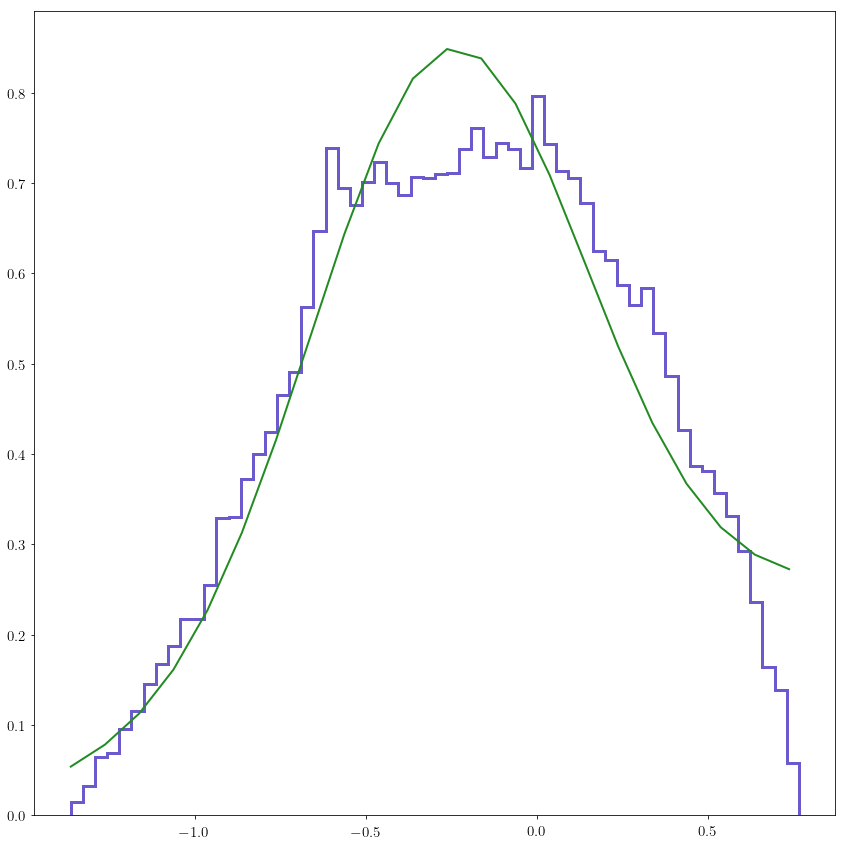

In [143]:
sel = (phi1 > -10) & (phi1 < 5)
sel &= (np.abs(phi2) < 0.7)
lat = phi2[sel]-track_combo_phi12(phi1[sel])

plot_fit(sampler, lat)

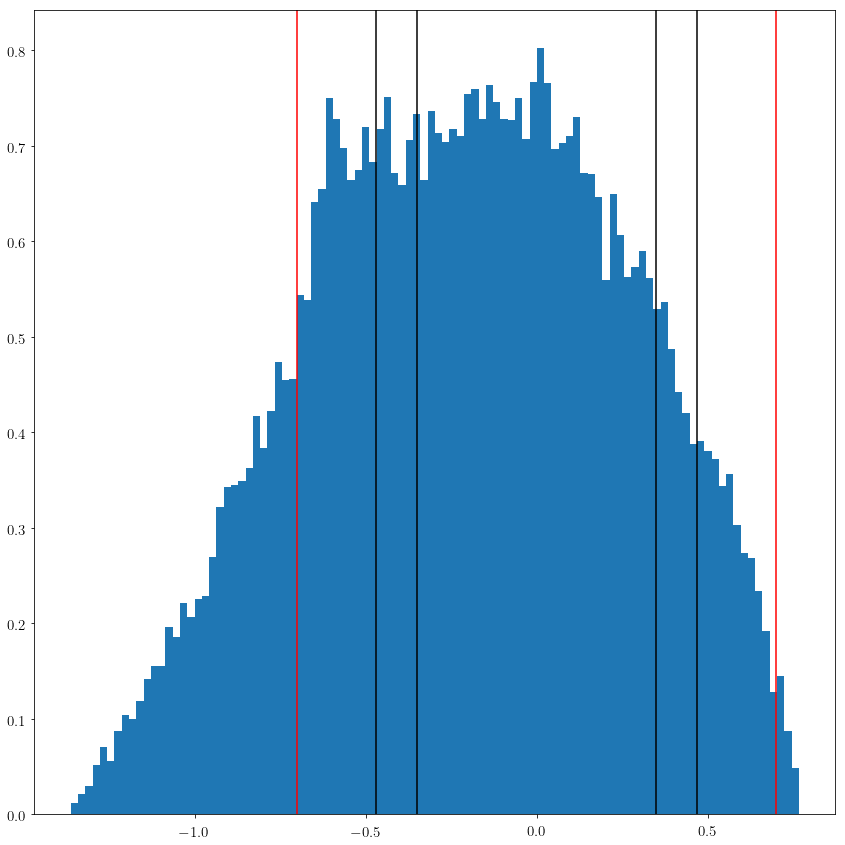

In [144]:
plt.figure()
# plt.hist(phi2[sel]-track_combo_phi12(phi1[sel]), bins=100, normed=True)
plt.hist(lat, bins=100, normed=True)
plt.axvline(0.35, c='k')
plt.axvline(-0.35, c='k')
plt.axvline(0.47, c='k')
plt.axvline(-0.47, c='k')
plt.axvline(0.7, c='r')
plt.axvline(-0.7, c='r')

# xx = np.linspace(-5, 5, 100)
# plt.plot(xx, gaus(xx, 0, 0.35, 0.1, -0.001, 0.095), lw=3, c='seagreen')
# plt.plot(xx, gaus(xx, 0, 0.47, 0.1, -0.001, 0.095), lw=3, c='m')

plt.show()

In [15]:
data300

FITS_rec([(137.57458637, 22.3787253 , 0, 21.718233, 21.16225 ),
          (137.66739229, 22.3753885 , 0, 17.618237, 17.068262),
          (137.82906612, 22.37736496, 0, 21.324978, 20.634995), ...,
          (170.16414064,  8.11849152, 0, 22.519293, 22.030993),
          (170.00325269,  8.12399987, 0, 20.51309 , 20.045975),
          (170.14911652,  8.37914132, 0, 21.471106, 21.159603)],
         dtype=(numpy.record, [('RA', '>f8'), ('DEC', '>f8'), ('EXTENDED_CLASS', '>i8'), ('MAG_SFD_G', '>f4'), ('MAG_SFD_R', '>f4')]))

In [89]:
on = np.abs(phi2) < 1
off = phi2 < -3
off2 = phi2 > -3
off3 = np.abs(phi2) > 3

dx, dy =  0.04 0.16666666666666666
dx, dy =  0.04 0.16666666666666666
dx, dy =  0.04 0.16666666666666666


(<matplotlib.axes._subplots.AxesSubplot at 0x11b616b10>,
 <matplotlib.image.AxesImage at 0x1187aedd0>)

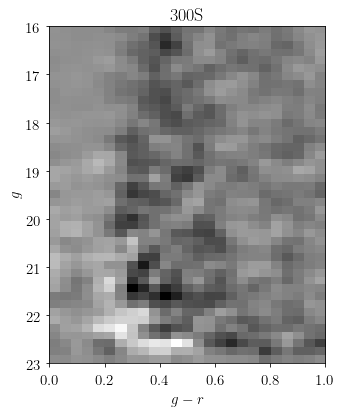

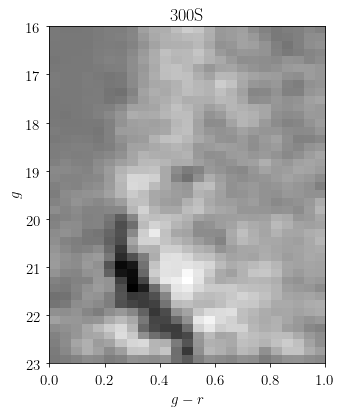

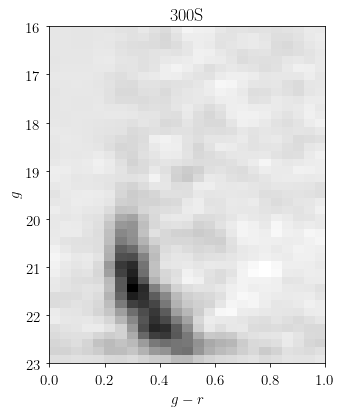

In [90]:
import plot_hess
plot_hess.plot_hess( '300S', data300[on], data300[off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
plot_hess.plot_hess('300S', data300[on], data300[off2], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
plot_hess.plot_hess('300S', data300[on], data300[off3], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)

In [84]:
import filter_data
mu = plot_density.dist2mod(20.)
age = 13
z = 0.0001
iso = filter_data.isochrone_factory('Dotter', survey='des', age=age, distance_modulus=mu, z=z)
z = iso.feh2z(-1.5)
iso = filter_data.isochrone_factory('Dotter', survey='des', age=age, distance_modulus=mu, z=z)


In [85]:
import pandas as pd
s5_data = pd.read_csv('/Users/nora/projects/stream_fitting_1/galpot/300S_member_prelim.csv')

In [86]:
s5_data['decam_g0'] = s5_data['decam_g'] - 3.186 * s5_data['ebv']
s5_data['decam_r0'] = s5_data['decam_r'] - 2.140 * s5_data['ebv']
s5_data['decam_i0'] = s5_data['decam_i'] - 1.569 * s5_data['ebv']
s5_data['decam_z0'] = s5_data['decam_z'] - 1.196 * s5_data['ebv']

dx, dy =  0.04 0.16666666666666666


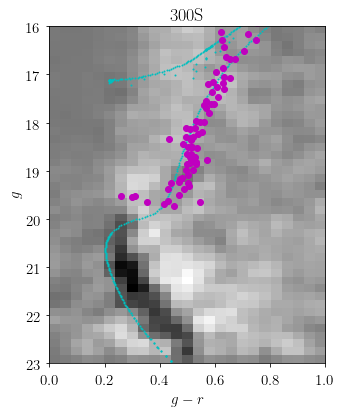

In [88]:
import plot_hess
# plot_hess.plot_hess( '300S', data300[on], data300[off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
plot_hess.plot_hess('300S', data300[on], data300[off2], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23)
plt.scatter(iso.color, iso.mag+mu, c='c', s=1)
# plt.scatter(iso.color, iso.mag+plot_density.dist2mod(26), c='lime', s=1)
# plt.scatter(spec_data['g']-spec_data['r'], spec_data['g'], c='r')
plt.scatter(s5_data['decam_g0']-s5_data['decam_r0'], s5_data['decam_g0'], c='m')
plt.xlim(0,1)
plt.ylim(23, 16)
plt.savefig('/Users/nora/Desktop/plot_dump/300S_cmd_3.png')

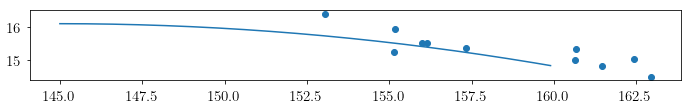

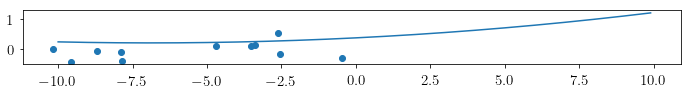

In [124]:
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_aspect('equal')

plt.scatter(spec_data['ra'], spec_data['dec'])

x = np.arange(ends[0][0], ends[1][0], 0.1)
y = track_radec(x)
plt.plot(x, y)

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_aspect('equal')

plt.scatter(spec_phi1, spec_phi2)

x = np.arange(-10, 10, 0.1)
y = track_phi12(x)
plt.plot(x, y)

plt.show()

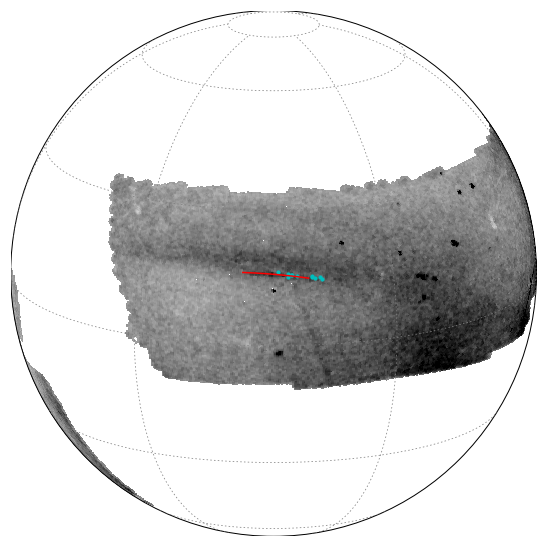

In [122]:
reload(plot_density)
mu = 16
coords='cel'
lon, lat = 152, 16
center = (lon, lat)
vmin, vmax = 0, 12
sigma = 0.2
proj = 'ortho'
stream = None

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
smap = plot_density.plot_density(data, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)

xx, yy = smap(spec_data['ra'], spec_data['dec'])
smap.scatter(xx, yy, c='c', s=10)

x = np.arange(ends[0][0], ends[1][0], 0.1)
xx, yy = smap(x, track_radec(x))
smap.plot(xx, yy, c='r')

# x = np.arange(-10, 10, 0.1)
# y = track_phi12(x)
# ra, dec = rotation_matrix.phi12_rotmat(x, y, np.linalg.inv(R))
# xx, yy = smap(ra, dec)
# smap.plot(xx, yy, c='g')

# xx, yy = smap(ra_ll, dec_bb)
# smap.scatter(xx, yy, c='r', s=10)

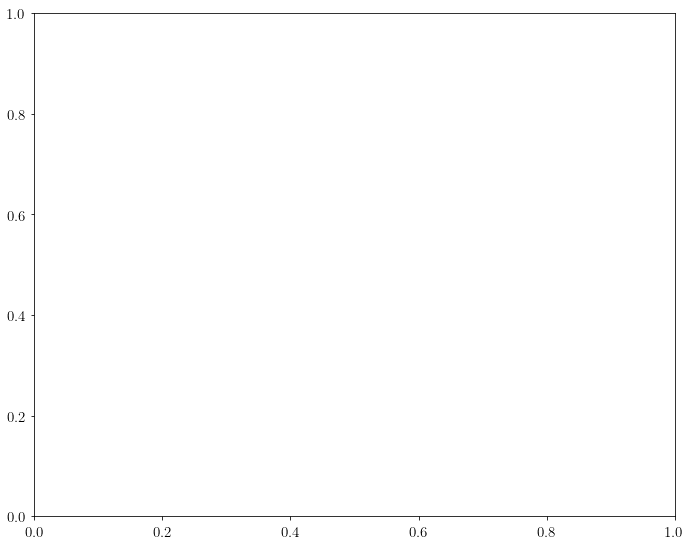

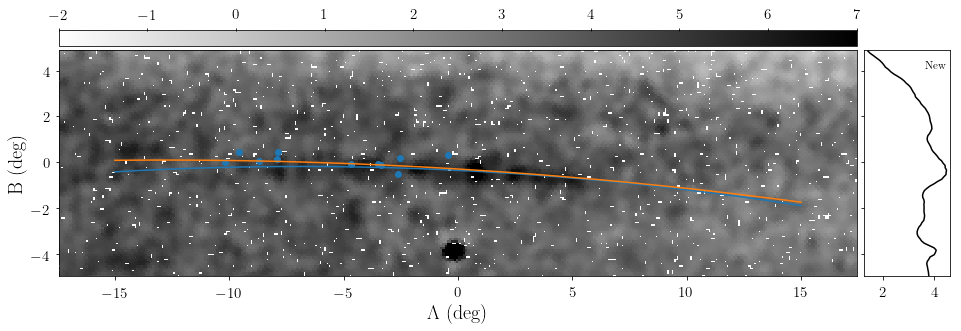

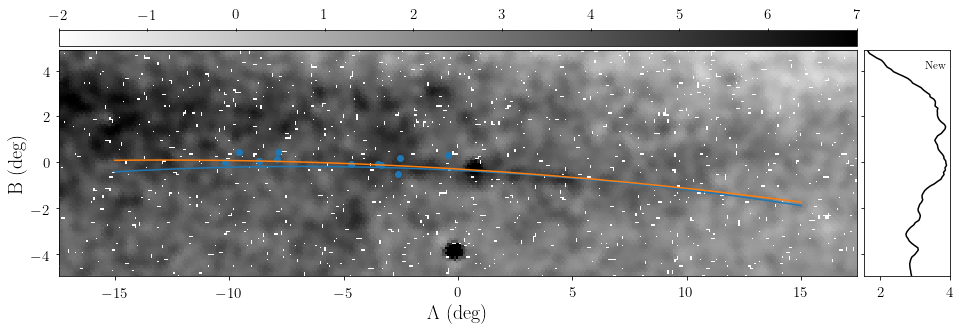

In [136]:
ends = [(145, 17), (160, 15)]
xx = np.linspace(-15, 15, 100)
for mu in [16.0, 16.6]:
    ax = plot_density.plot_stream_zoom(hpxcube, fracdet, modulus, stream=None, ends=ends, mu=mu, width=0.3, sigma=0.2, delta=0.1, vmin=-2, vmax=7)
    ax.plot(xx, -track_phi12(xx))
    ax.plot(xx, -track_combo_phi12(xx))
    ax.scatter(spec_phi1, -spec_phi2)
    # ax.scatter(spec_phi1, spec_phi2, s=15, c='r')
    # plt.savefig('../plots_%.1f_%.1f_%.1f_%.1f_%.1f.png' %(ends[0][0], ends[0][1], ends[1][0], ends[1][1], mu))

In [77]:
xx = np.arange(-10, 10+0.5/2, 0.5)

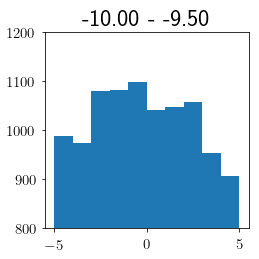

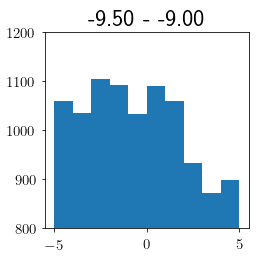

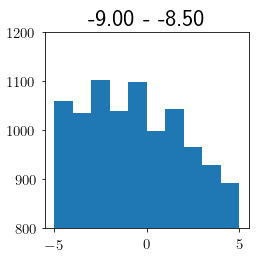

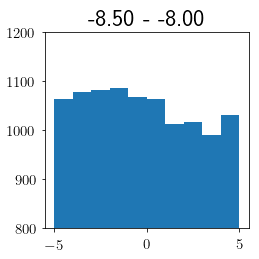

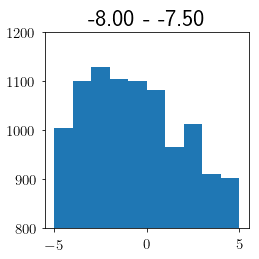

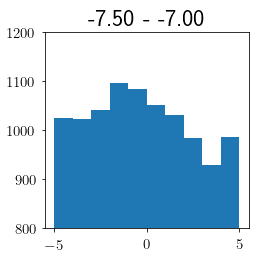

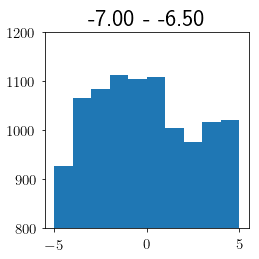

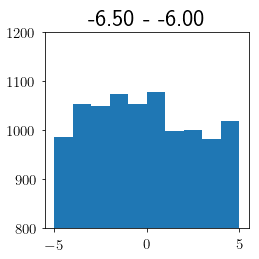

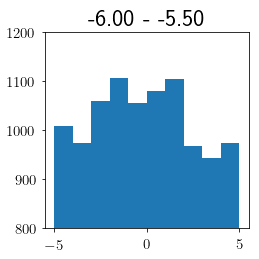

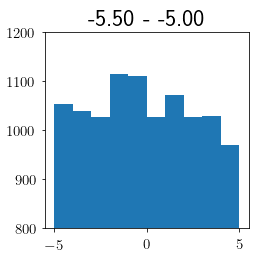

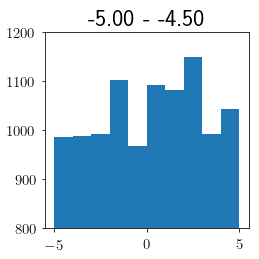

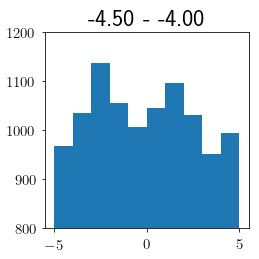

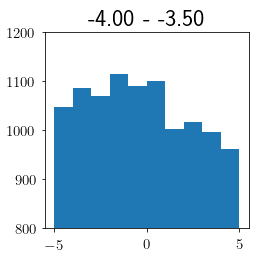

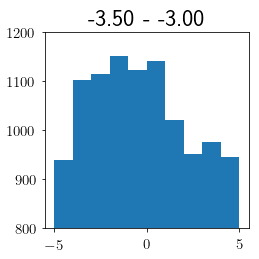

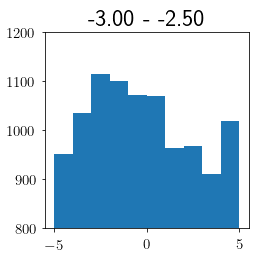

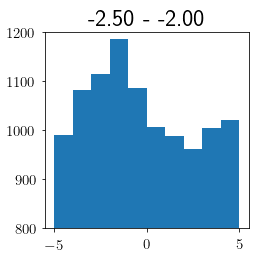

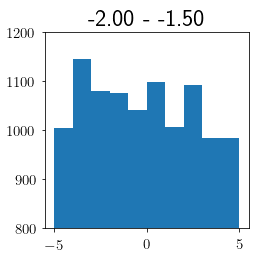

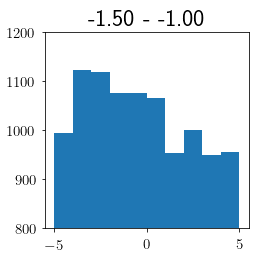

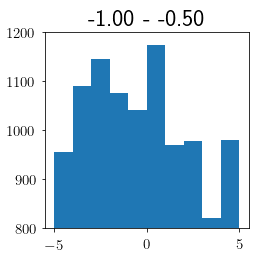

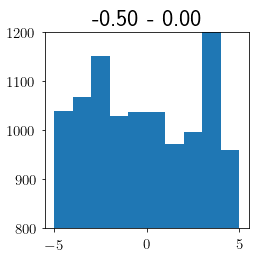

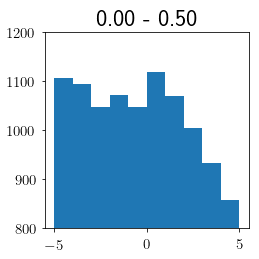

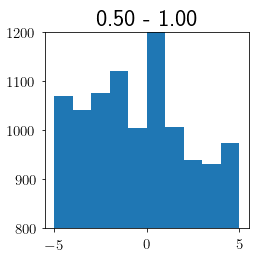

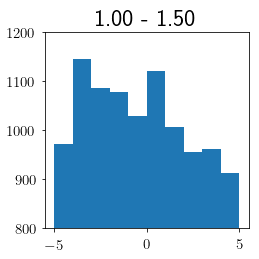

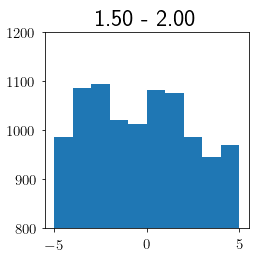

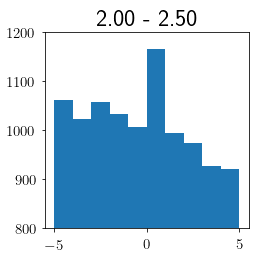

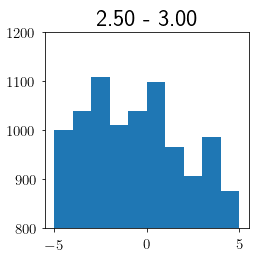

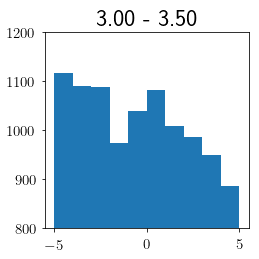

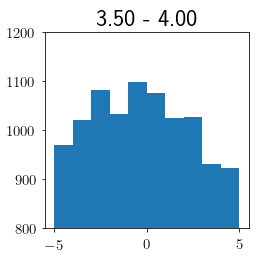

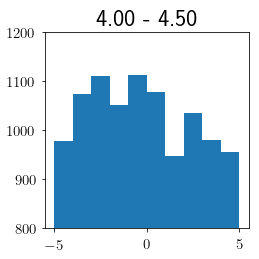

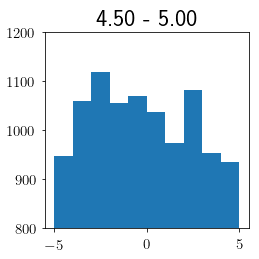

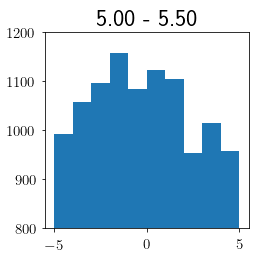

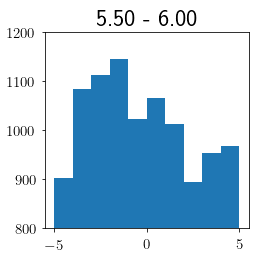

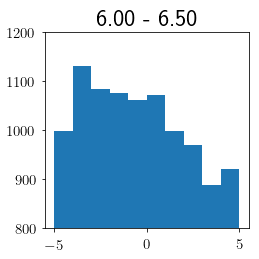

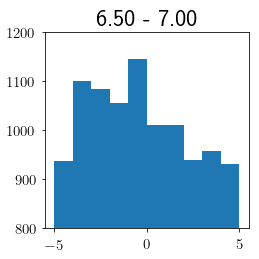

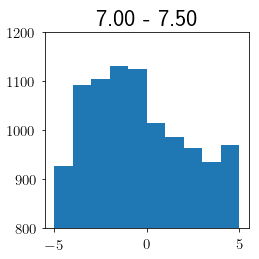

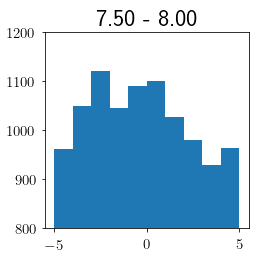

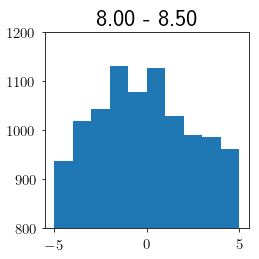

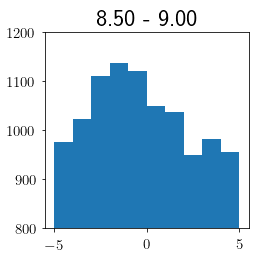

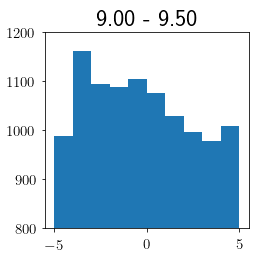

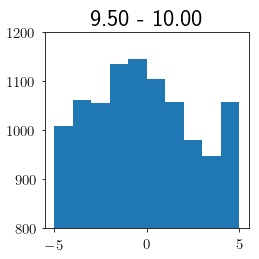

In [80]:
for i, x in enumerate(xx[:-1]):
    sel = (phi1 > x) & (phi1 < xx[i+1])
    plt.figure(figsize=(4,4))
    plt.hist(phi2[sel])
    plt.title('%.2f - %.2f' %(x, xx[i+1]))
    plt.ylim(800, 1200)
plt.show()

In [84]:
import filter_data
err = lambda x: 0.0010908679647672335 + \
             np.exp((x - 27.091072029215375) / 1.0904624484538419)
iso_sel = filter_data.select_isochrone(data300['MAG_SFD_G'], data300['MAG_SFD_R'], err, iso_params=[16.0, 12.5, 0.00047], dmu=0.5, C=[0.05, 0.1], E=2, gmin=None, survey='DECaLS')

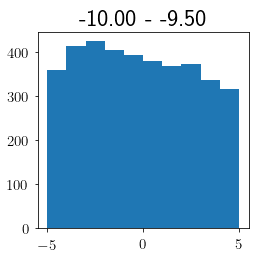

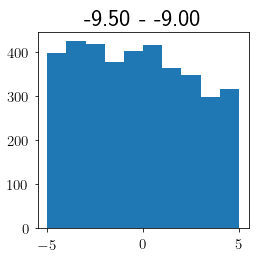

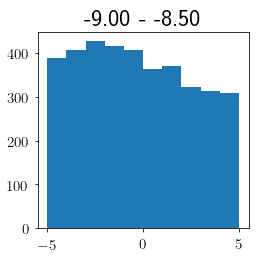

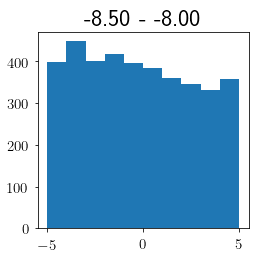

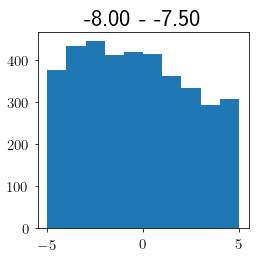

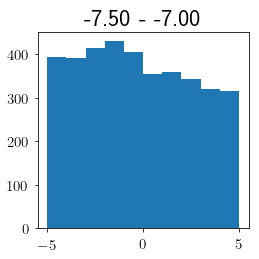

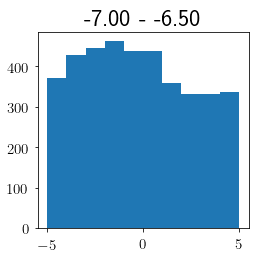

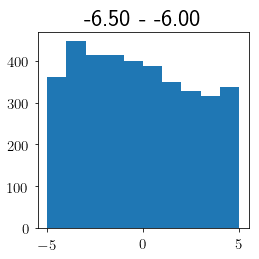

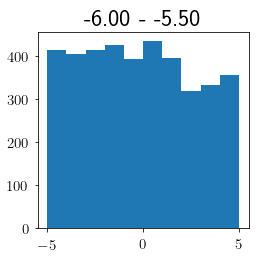

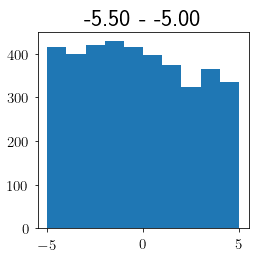

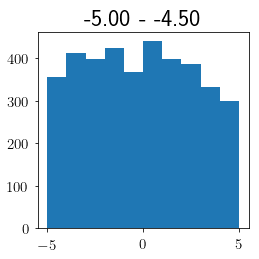

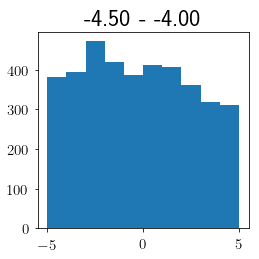

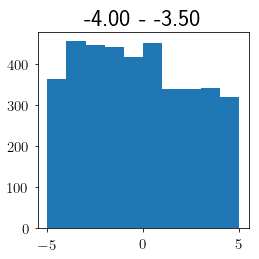

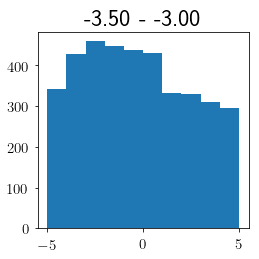

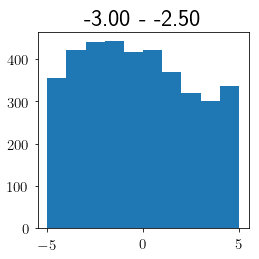

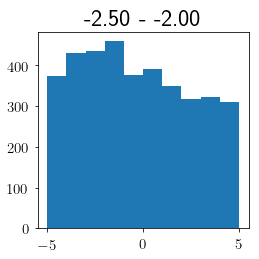

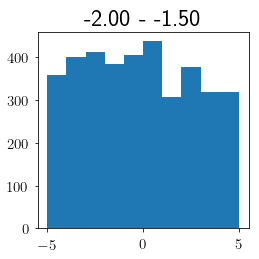

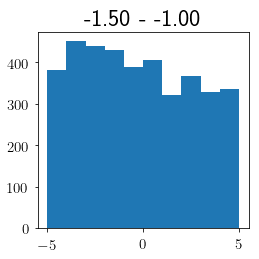

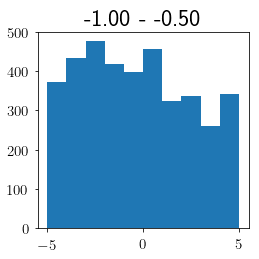

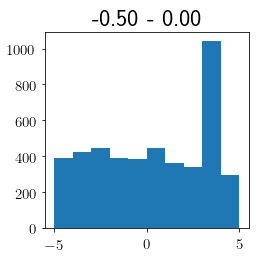

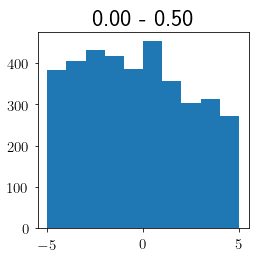

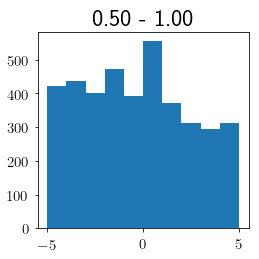

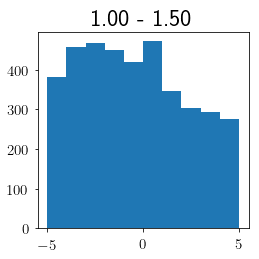

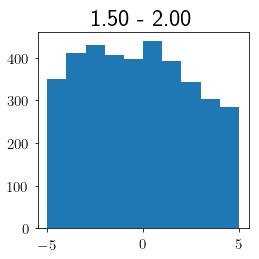

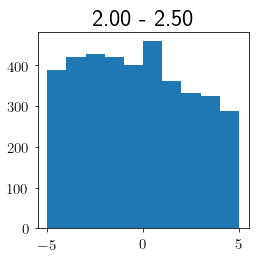

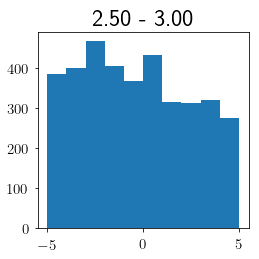

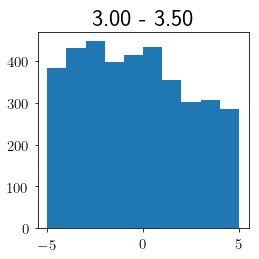

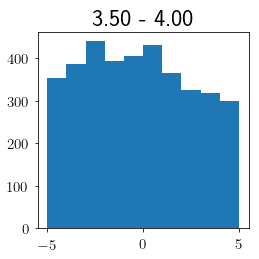

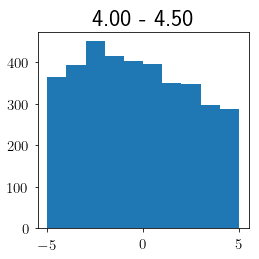

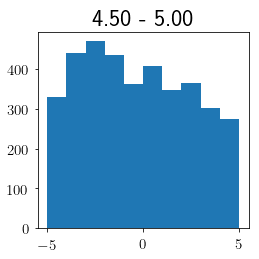

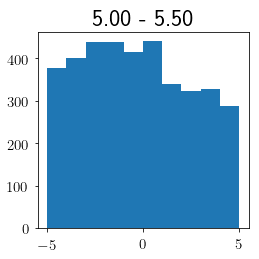

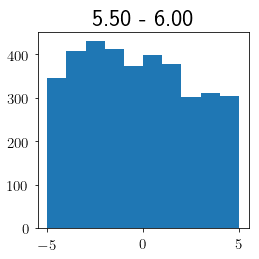

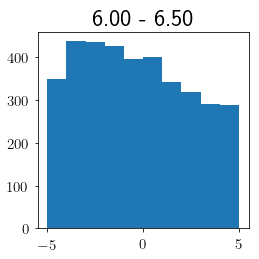

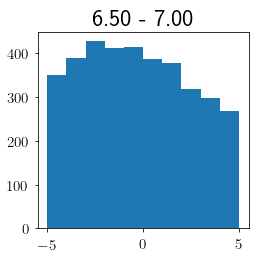

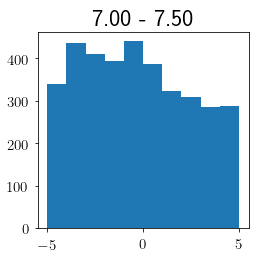

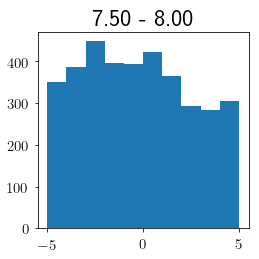

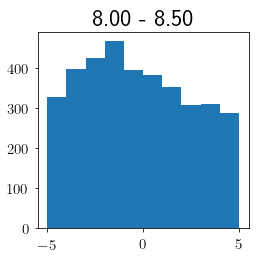

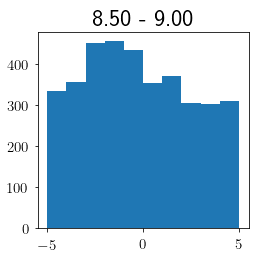

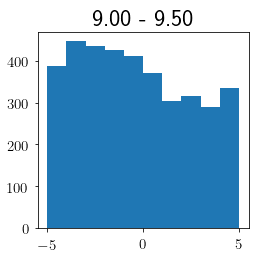

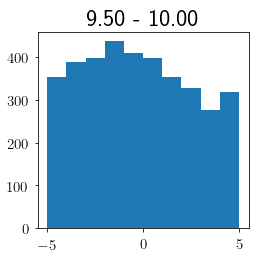

In [87]:
for i, x in enumerate(xx[:-1]):
    sel = (phi1 > x) & (phi1 < xx[i+1])
    plt.figure(figsize=(4,4))
    plt.hist(phi2[iso_sel&sel])
    plt.title('%.2f - %.2f' %(x, xx[i+1]))
    # plt.ylim(800, 1200)
plt.show()